In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Dataset Preparation

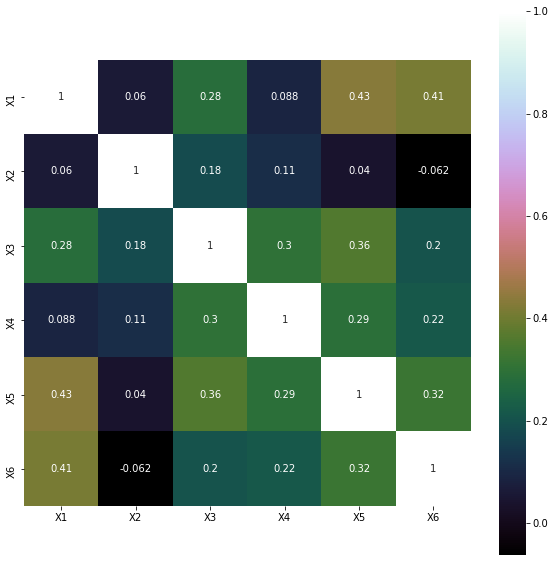

In [2]:
# read data
df = pd.read_csv("data/ACME-HappinessSurvey2020.csv")

# labels
y = np.array(df['Y'])

# delete labels from the dataset
del df['Y']

# features
X = np.array(df)
X = StandardScaler().fit_transform(X)

# feature names
ftr_names = list(df.columns)

# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

# delete dataframe
del df

In [3]:
X.shape, y.shape

((126, 6), (126,))

### Baseline Results

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

classifiers = {
    "KNearest":      KNeighborsClassifier(3), 
    "RBF SVM":       SVC(gamma=2, C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5), 
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), 
    "Neural Net":    MLPClassifier(alpha=1, max_iter=1000), 
    "XGB":           xgb.XGBClassifier(),   
}

accuracies = []

print("accuracies:")
for key, model in classifiers.items():
    model.fit(X, y)
    accuracies.append(model.score(X, y)*100)
    print(f"{accuracies[-1]:.2f}% - {key}")

accuracies:
77.78% - KNearest
94.44% - RBF SVM
77.78% - Decision Tree
82.54% - Random Forest
80.16% - Neural Net
93.65% - XGB


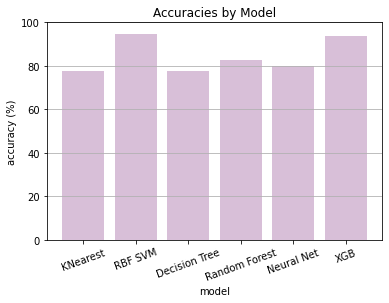

In [19]:
x_pos = range(len(accuracies))

plt.gca().yaxis.grid()
plt.bar(x_pos, accuracies, color='thistle')
plt.xticks(x_pos, classifiers.keys(), rotation=20)
plt.title("Accuracies by Model")
plt.xlabel("model")
plt.ylabel("accuracy (%)")
plt.ylim(0,100)

plt.show()

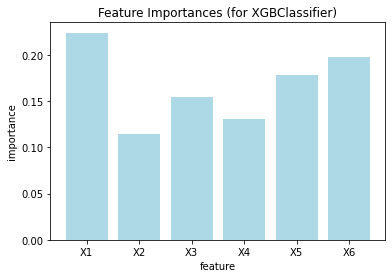

In [16]:
fi = model.feature_importances_
x_pos = [i for i, _ in enumerate(fi)]

plt.bar(x_pos, fi, color='lightblue')
plt.xticks(x_pos, ftr_names)
plt.title("Feature Importances (for XGBClassifier)")
plt.xlabel("feature")
plt.ylabel("importance")
plt.show()

In [17]:
print("ftr, imp")
for ftr in list(zip(ftr_names, model.feature_importances_)):
    print(f"{ftr[0]}: {ftr[1]:.2f}")

ftr, imp
X1: 0.22
X2: 0.11
X3: 0.15
X4: 0.13
X5: 0.18
X6: 0.20


In [21]:
print(f"Feature '{ftr_names[np.argmin(model.feature_importances_)]}' provides the least information (for XGB approach), therefore it is the best candidate to be removed.")

Feature 'X2' provides the least information (for XGB approach), therefore it is the best candidate to be removed.
